# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [49]:
import pandas as pd

In [50]:
dados = pd.read_csv('marketing_investimento.csv', sep=',')

In [51]:
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [52]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [53]:
import plotly.express as px

In [54]:
px.histogram(dados, x = 'aderencia_investimento', text_auto = True)

In [55]:
px.histogram(dados, x = 'estado_civil', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [56]:
px.histogram(dados, x = 'escolaridade', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [57]:
px.histogram(dados, x = 'inadimplencia', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [58]:
px.histogram(dados, x = 'fez_emprestimo', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

### Variáveis numéricas

In [59]:
px.box(dados, x = 'idade', color = 'aderencia_investimento')

In [60]:
px.box(dados, x = 'saldo', color = 'aderencia_investimento')

In [61]:
px.box(dados, x = 'tempo_ult_contato', color = 'aderencia_investimento')

In [62]:
px.box(dados, x = 'numero_contatos', color = 'aderencia_investimento')

In [63]:
x = dados.drop('aderencia_investimento', axis=1)
y = dados['aderencia_investimento']

In [64]:
x.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4


In [65]:
y.head()

0    sim
1    sim
2    nao
3    sim
4    sim
Name: aderencia_investimento, dtype: object

In [66]:
from sklearn.compose import make_column_transformer as sk 
from sklearn.preprocessing import OneHotEncoder as one 

In [67]:
colunas = x.columns

In [68]:
one_hot = sk((
    one(drop='if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder='passthrough', sparse_threshold=0)

In [69]:
x = one_hot.fit_transform(x)

In [70]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [71]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas)).head()

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0


In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
lb = LabelEncoder()

In [74]:
y = lb.fit_transform(y)

In [75]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [76]:
from sklearn.model_selection import train_test_split as ts

In [77]:
x_treino, x_teste, y_treino, y_teste = ts(x, y, stratify=y, random_state=5)

In [79]:
from sklearn.dummy import DummyClassifier

In [81]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.6025236593059937

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
tree = DecisionTreeClassifier(random_state=5)
tree.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [86]:
tree.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [87]:
tree.score(x_teste,y_teste)

0.6656151419558359

In [89]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [90]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']


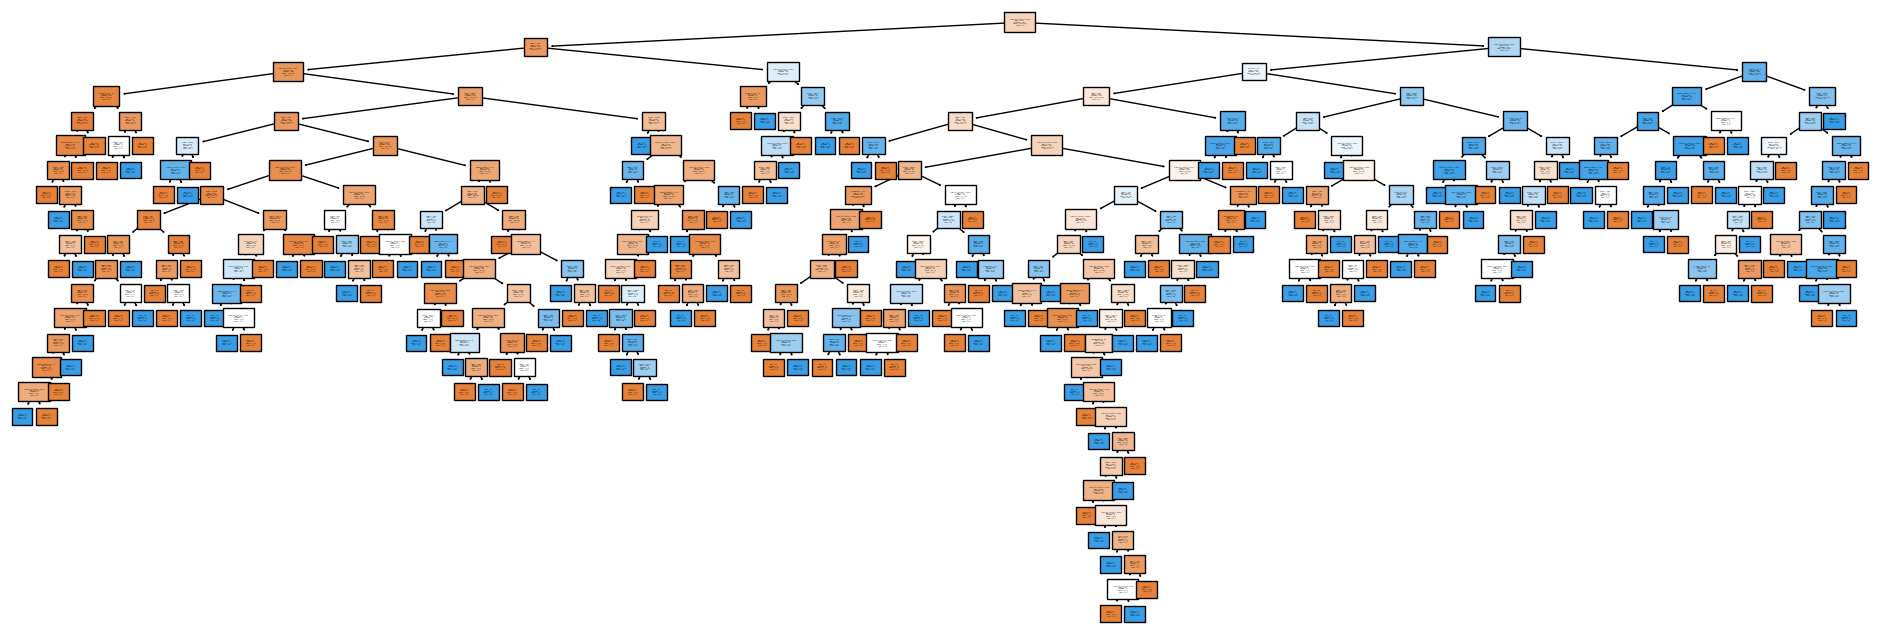

In [93]:
plt.figure(figsize=(24, 8))
plot_tree(tree, filled=True, class_names=['não', 'sim'], fontsize=1, feature_names=nome_colunas);

In [94]:
tree.score(x_treino, y_treino)

1.0

In [95]:
tree = DecisionTreeClassifier(max_depth=3, random_state=5)
tree.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [96]:
tree.score(x_treino, y_treino)

0.7613038906414301

In [97]:
tree.score(x_teste, y_teste)

0.7160883280757098

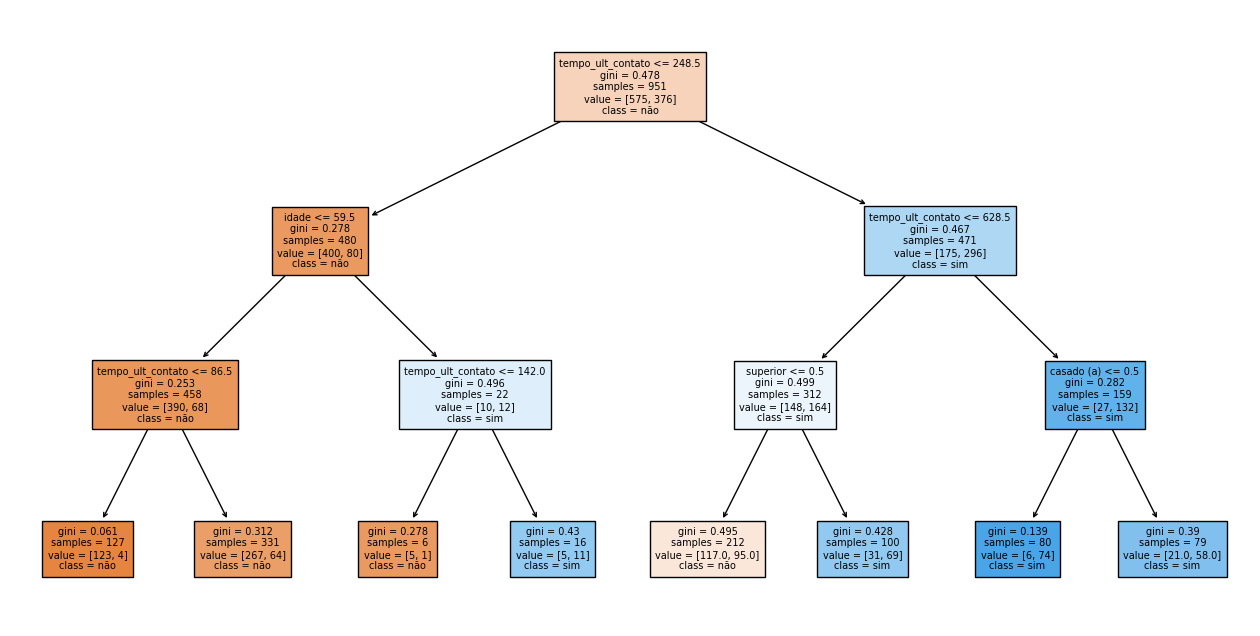

In [100]:
plt.figure(figsize=(16, 8))
plot_tree(tree, filled=True, class_names=['não', 'sim'], fontsize=7, feature_names=nome_colunas);

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
normalize = MinMaxScaler()
x_treino_norm = normalize.fit_transform(x_treino)


In [106]:
pd.DataFrame(x_treino_norm).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032


In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
kn = KNeighborsClassifier()

In [109]:
kn.fit(x_treino_norm, y_treino)

KNeighborsClassifier()

In [112]:
x_teste_norm = normalize.transform(x_teste)

In [113]:
kn.score(x_teste_norm, y_teste)

0.6876971608832808

In [114]:
print(f'acuracia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'acuracia tree: {tree.score(x_teste, y_teste)}')
print(f'acuracia knn: {kn.score(x_teste_norm, y_teste)}')

acuracia Dummy: 0.6025236593059937
acuracia tree: 0.7160883280757098
acuracia knn: 0.6876971608832808


In [115]:
import pickle

In [116]:
with open("modelo_onehotenc.pkl", "wb") as arquivo:
    pickle.dump(one_hot, arquivo)

In [117]:
with open("modelo_tree.pkl", "wb") as arquivo:
    pickle.dump(tree, arquivo)

In [118]:
with open("modelo_knn.pkl", "wb") as arquivo:
    pickle.dump(kn, arquivo)

In [120]:
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


In [121]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}


In [122]:
novo_dado = pd.DataFrame(novo_dado)

In [123]:
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [125]:
modelo_oneHot = pd.read_pickle('modelo_onehotenc.pkl')
modelo_tree = pd.read_pickle('modelo_tree.pkl')

In [126]:
novo_dado = modelo_oneHot.transform(novo_dado)
modelo_tree.predict(novo_dado)

array([1])